In [1]:
# Some style stuff for the plots

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import matplotlib.style as mplstyle
%matplotlib inline
mplstyle.use('ggplot')

I need a set of distibutions 2 through 600, where each one represents a distribution of open rates such that at the first distribution (2) there can only be open rates of 0%, 50% and 100%. At the second (3) there can only be 0, 33.33%, 66.66% and 100% open rates and so on.

But let's start off simple. Let's simulate just the first distribution first. I need a binomial distribution with an average at .2 with three possible scenarios.

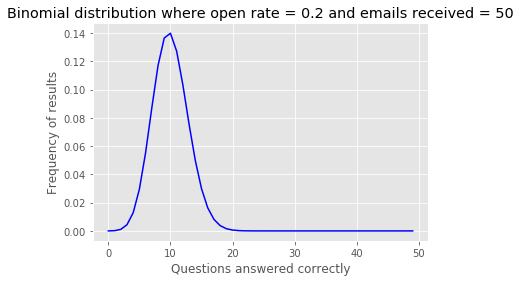

In [2]:
n = 50  # number of emails
p = .2  # hypothesis of open rate
x = np.arange(0, 50)  # x axis limits

dist = stats.binom.pmf(x, n, p)  # Probability mass function, aka the maths

plt.plot(x, dist, color='b')
plt.title(f'Binomial distribution where open rate = {p} and emails received = {n}')
plt.ylabel('Frequency of results')
plt.xlabel('Questions answered correctly')

In [3]:
foo = np.random.binomial(2, .2, 10)

foo

array([0, 0, 1, 1, 1, 0, 0, 1, 2, 1])

In [4]:
# opened emails and open rate

list(zip(foo, foo / 2))

[(0, 0.0),
 (0, 0.0),
 (1, 0.5),
 (1, 0.5),
 (1, 0.5),
 (0, 0.0),
 (0, 0.0),
 (1, 0.5),
 (2, 1.0),
 (1, 0.5)]

In [5]:
def binomial_email_dists(N=100, p=0.2):
    """"""
    df = pd.DataFrame()
    
    for n in range(2,601):
        bar = np.random.binomial(n, p, N)
        df[f'n{n}'] = bar / n
        
    return df

bar = binomial_email_dists()

bar.head()

,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,...,n591,n592,n593,n594,n595,n596,n597,n598,n599,n600
0,0.5,0.000000,0.25,0.0,0.333333,0.000000,0.000,0.222222,0.1,0.000000,...,0.184433,0.182432,0.212479,0.190236,0.191597,0.191275,0.194305,0.198997,0.175292,0.206667
1,0.0,0.000000,0.00,0.4,0.000000,0.142857,0.000,0.444444,0.3,0.272727,...,0.228426,0.189189,0.204047,0.232323,0.216807,0.189597,0.190955,0.217391,0.198664,0.213333
2,0.5,0.333333,0.50,0.2,0.166667,0.428571,0.625,0.000000,0.2,0.090909,...,0.213198,0.189189,0.173693,0.193603,0.186555,0.182886,0.197655,0.222408,0.207012,0.191667
3,0.5,0.000000,0.25,0.0,0.000000,0.000000,0.250,0.222222,0.1,0.090909,...,0.197970,0.209459,0.172007,0.170034,0.211765,0.187919,0.207705,0.195652,0.185309,0.211667
4,0.0,0.000000,0.00,0.0,0.000000,0.142857,0.000,0.111111,0.2,0.272727,...,0.172589,0.221284,0.212479,0.196970,0.198319,0.199664,0.209380,0.170569,0.202003,0.191667


In [6]:
for name in bar.columns[::31]:
    print(name, bar[f'{name}'].mean())

n2 0.15
n33 0.195151515152
n64 0.20765625
n95 0.201157894737
n126 0.206825396825
n157 0.198789808917
n188 0.19170212766
n219 0.196803652968
n250 0.19752
n281 0.200604982206
n312 0.202211538462
n343 0.19889212828
n374 0.200614973262
n405 0.200098765432
n436 0.19997706422
n467 0.197173447537
n498 0.201024096386
n529 0.198015122873
n560 0.199803571429
n591 0.19883248731


Ok so that's the kind of data frame I want. Kind of. This is too neat. There are exactly 100 instances at each level. The real data will not look like that. I'll need dummy data. How do I do that? Ok so each record will have a few key statistics

1. ID
1. Number of emails received
1. Number of emails opened
1. Open rate

So I can say each person gets a number of emails. For example some random number between 2 and 600. The number of emails opened is an np.random.binom number based on the number of emails received.

Ok how do I generate the random number and the binomial open rate?

In [7]:
a = np.random.randint(0, 600)
b = np.random.binomial(a, .2)

print(a, b)

122 34


In [8]:
# Or better yet, let's do a chi square distribution

pd.DataFrame(np.random.chisquare(50, 1000)).describe()

# nice.

,0
count,1000.000000
mean,50.112687
std,10.076032
min,25.302136
25%,42.937893
50%,49.517683
75%,56.850957
max,83.090112


In [9]:
def sim_data(mu=50, N=50):
    
    def emails_opened(x):
        return np.random.binomial(x, .2)
    
    df = pd.DataFrame()
    
    x = np.random.chisquare(mu, N)  # Pick a number from the ch2 distribution
    
    df['received'] = np.floor(x)  # Remove desicmal places
    df['opens'] = df['received'].apply(emails_opened)
    df['rate'] = df['opens']/df['received']
    
    return df

In [10]:
amt = 500_000

foo = sim_data(N=amt)

foo.head()

,received,opens,rate
0,38.0,6,0.157895
1,38.0,12,0.315789
2,56.0,9,0.160714
3,33.0,3,0.090909
4,43.0,11,0.255814


In [11]:
foo['received'].describe()

count    500000.000000
mean         49.507982
std          10.025636
min          16.000000
25%          42.000000
50%          49.000000
75%          56.000000
max         112.000000
Name: received, dtype: float64

In [12]:
spots = [20, 50, 100]

for i in spots:
    print(i, foo['opens'][foo['received'] == i].count())

20 33
50 19350
100 9


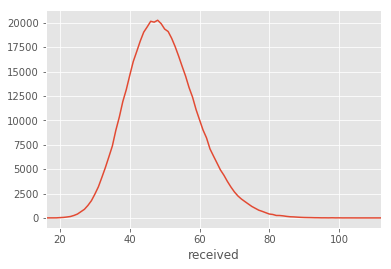

In [13]:
foo['opens'].groupby(foo['received']).count().plot()

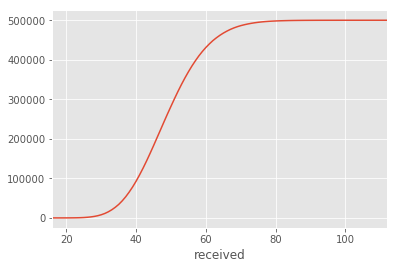

In [14]:
foo['opens'].groupby(foo['received']).count().cumsum().plot()

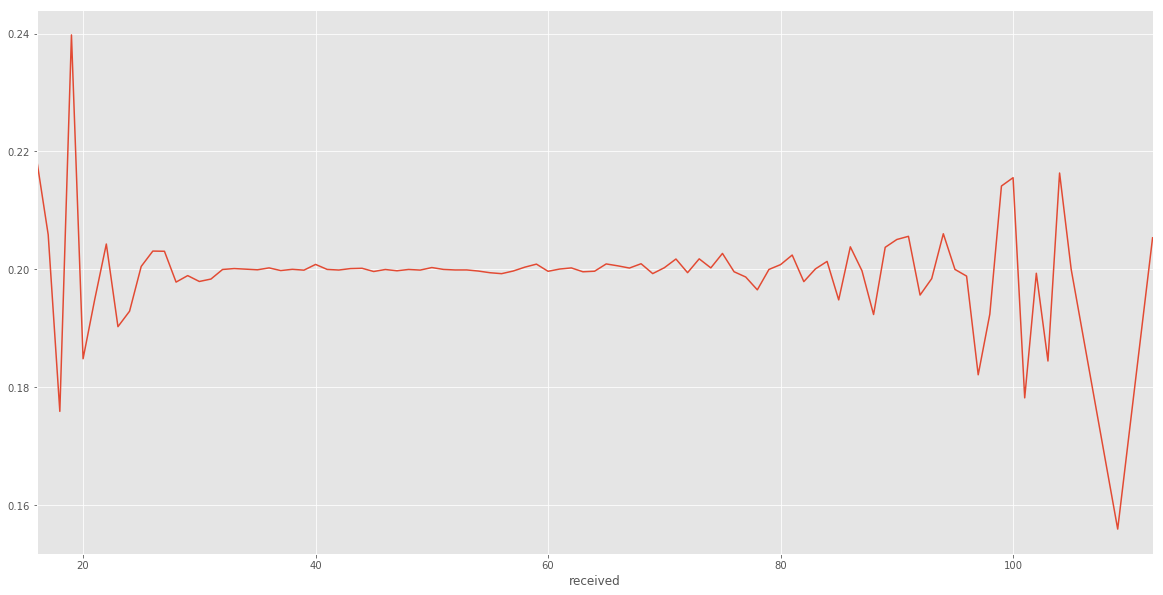

In [15]:
foo['rate'].groupby(foo['received']).mean().plot(figsize=(20,10))

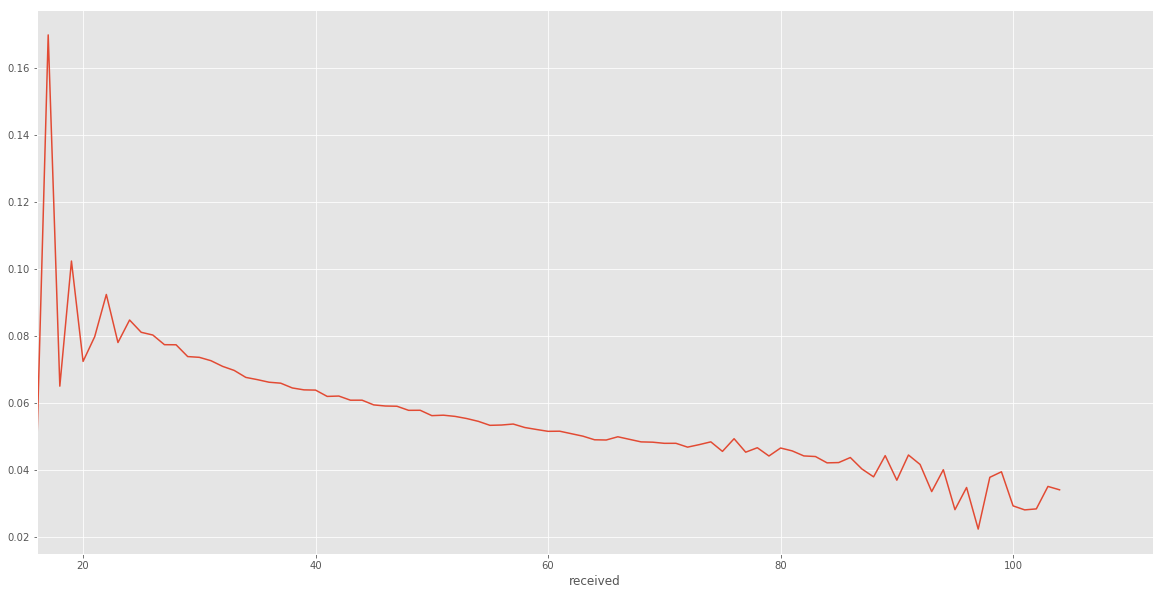

In [16]:
foo['rate'].groupby(foo['received']).std().plot(figsize=(20,10))

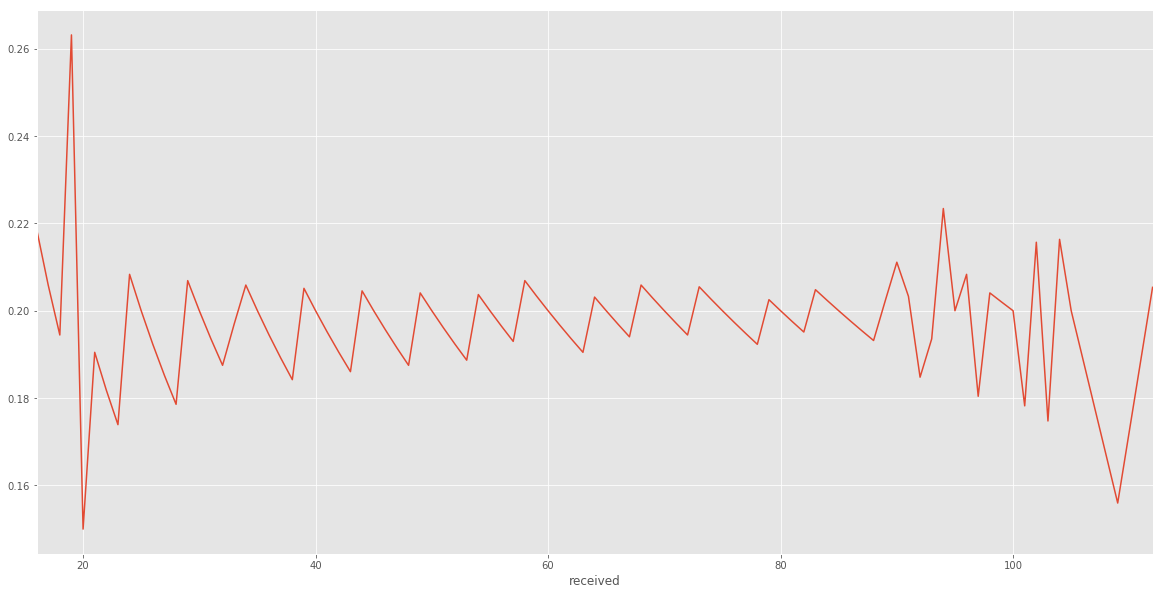

In [17]:
foo['rate'].groupby(foo['received']).median().plot(figsize=(20,10))